<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-THULAC:-segmentation-+-POS" data-toc-modified-id="1.-THULAC:-segmentation-+-POS-1">1. THULAC: segmentation + POS</a></span></li><li><span><a href="#2.-SnowNLP:-segmentation,-summary,-keyword-extraction,-and-sentiment" data-toc-modified-id="2.-SnowNLP:-segmentation,-summary,-keyword-extraction,-and-sentiment-2">2. SnowNLP: segmentation, summary, keyword extraction, and sentiment</a></span></li><li><span><a href="#3.-Entity-extraction-in-LAC-(part-of-Baidu-PaddleNLP)" data-toc-modified-id="3.-Entity-extraction-in-LAC-(part-of-Baidu-PaddleNLP)-3">3. Entity extraction in LAC (part of Baidu PaddleNLP)</a></span></li></ul></div>

# 1. THULAC: segmentation + POS

In [1]:
 import thulac	

 thu1 = thulac.thulac()  #默认模式
 text = thu1.cut("我爱北京天安门", text=True)  #进行一句话分词
 print("The segmented POS string is " + text)

Model loaded succeed
The segmented POS string is 我_r 爱_v 北京_ns 天安门_ns


# 2. SnowNLP: segmentation, summary, keyword extraction, and sentiment

In [2]:
from snownlp import SnowNLP

text = "自然语言处理是计算机科学领域与人工智能领域中的一个重要方向。它研究能实现人与计算机之间用自然语言进行有效通信的各种理论和方法。自然语言处理是一门融语言学、计算机科学、数学于一体的科学。因此，这一领域的研究将涉及自然语言，即人们日常使用的语言，所以它与语言学的研究有着密切的联系，但又有重要的区别。自然语言处理并不是一般地研究自然语言，而在于研制能有效地实现自然语言通信的计算机系统，特别是其中的软件系统。因而它是计算机科学的一部分。"

s = SnowNLP(text)

print("Segmented words:")
print (*s.words)

Segmented words:
自然 语言 处理 是 计算机 科学 领域 与 人工 智能 领域 中 的 一个 重要 方向 。 它 研究 能 实现 人 与 计算机 之间 用 自然 语言 进行 有效 通信 的 各种 理论 和 方法 。 自然 语言 处理 是 一 门融 语言 学 、 计算机 科学 、 数学 于 一体 的 科学 。 因此 ， 这 一 领域 的 研究 将 涉及 自然 语言 ， 即 人们 日常 使用 的 语言 ， 所以 它 与 语言学 的 研究 有着 密切 的 联系 ， 但 又 有 重要 的 区别 。 自然 语言 处理 并 不 是 一般 地 研究 自然 语言 ， 而 在于 研制 能 有效 地 实现 自然 语言 通信 的 计算机 系统 ， 特别 是 其中 的 软件 系统 。 因而 它 是 计算机 科学 的 一 部分 。


In [3]:
print ("Keywords are:")
print(*s.keywords(5))

Keywords are:
语言 自然 计算机 领域 研究


In [4]:
# Extractive summarization based on TextRank
print("Summary:")
print(s.summary(3))

Summary:
['因而它是计算机科学的一部分', '自然语言处理是计算机科学领域与人工智能领域中的一个重要方向', '自然语言处理是一门融语言学、计算机科学、数学于一体的科学']


In [5]:
print (f"The sentiment score: {str(s.sentiments)}")

The sentiment score: 1.0


# 3. Entity extraction in LAC (part of Baidu PaddleNLP)
Currently most Chinese NER is based on some modifications of POS labeling (i.e., LOC, ORG, TIME, and PER)

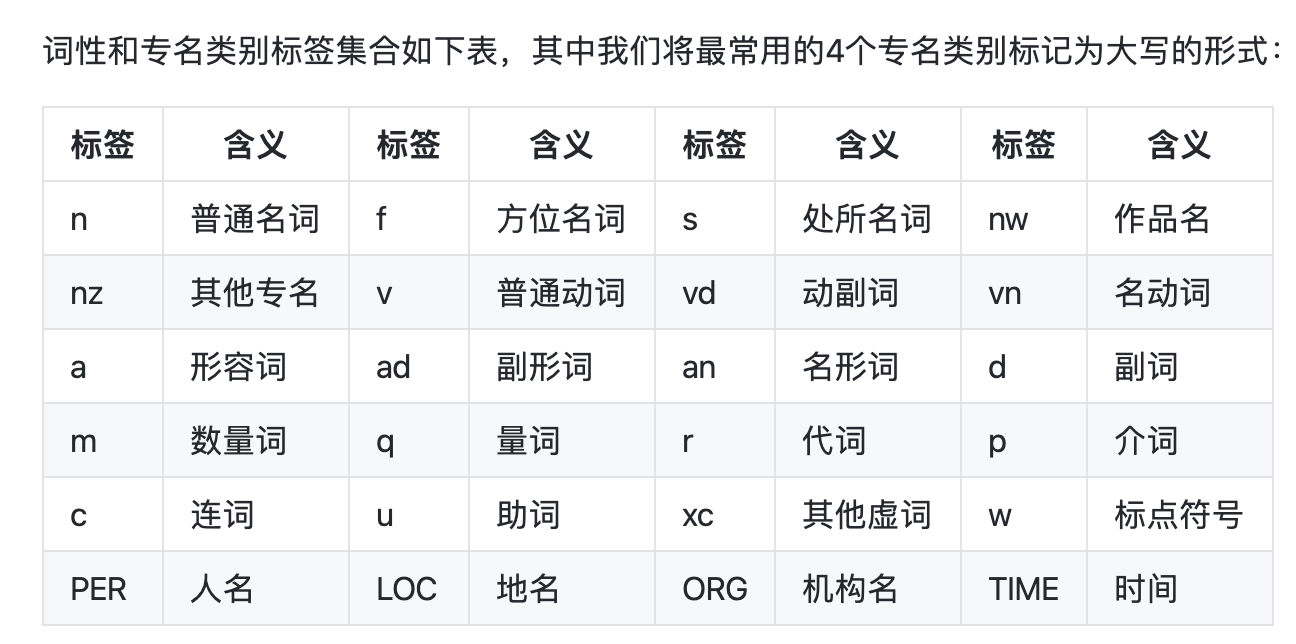

In [6]:
from LAC import LAC

lac = LAC(mode='lac')

# single sentence input
text = u"LAC是个优秀的分词工具"
lac_result = lac.run(text)
print(*lac_result)

['LAC', '是', '个', '优秀', '的', '分词', '工具'] ['nz', 'v', 'q', 'a', 'u', 'n', 'n']


In [7]:
# Parsing in builk


texts = [u"L已发现的巨齿鲨的部分椎骨化石与大白鲨相比大很多", u"推测它的最大身长范围是18米",u"这种鲨鱼平均14米长、40吨重。"]
lac_result = lac.run(texts)
print(*lac_result)

[['L', '已', '发现', '的', '巨齿鲨', '的', '部分', '椎骨化石', '与', '大白鲨', '相比', '大', '很多'], ['m', 'd', 'v', 'u', 'n', 'u', 'n', 'nz', 'p', 'n', 'v', 'a', 'a']] [['推测', '它', '的', '最大', '身长', '范围', '是', '18米'], ['v', 'r', 'u', 'a', 'n', 'n', 'v', 'm']] [['这种', '鲨鱼', '平均', '14米', '长', '、', '40吨', '重', '。'], ['r', 'n', 'a', 'm', 'a', 'w', 'm', 'a', 'w']]
